In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_311 = pd.read_csv("311.csv")
df_311.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101004168798,2022-02-07 11:33:00,2022-02-08 11:33:46,NaN,OVERDUE,Open,,Pothole,Public Works Department,Highway Maintenance,...,E18,Hyde Park,10,18,1818,INTERSECTION Hyde Park Ave & Madison St,NaN,42.3594,-71.0587,City Worker App
1,101004175491,2022-02-11 13:07:00,NaN,NaN,ONTIME,Open,,Fire Hydrant,Boston Water & Sewer Commission,Fire Hydrant,...,A1,Downtown / Financial District,4,3,0308,INTERSECTION East St & Atlantic Ave,NaN,42.3594,-71.0587,Constituent Call
2,101004146511,2022-01-25 16:51:00,NaN,NaN,ONTIME,Open,,Automotive Noise Disturbance,Boston Police Department,Noise Disturbance,...,C11,Dorchester,7,Ward 13,1309,27 Thornley St,2125.0,42.3145,-71.0592,Constituent Call
3,101004113411,2022-01-01 09:59:00,2022-01-04 08:30:00,NaN,OVERDUE,Open,,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,E18,Hyde Park,10,18,1819,INTERSECTION Dodge Rd & Leighton Rd,NaN,42.3594,-71.0587,Citizens Connect App
4,101004215566,2022-03-09 13:18:00,2022-03-10 13:18:36,NaN,OVERDUE,Open,,Sidewalk (Make Safe),Public Works Department,Highway Maintenance,...,A15,Charlestown,2,Ward 2,0206,18 School St,2129.0,42.3771,-71.0653,City Worker App


In [17]:
counts = df_311['type'].value_counts()
print(counts)

Parking Enforcement                            54158
Requests for Street Cleaning                   18231
Improper Storage of Trash (Barrels)            14967
Missed Trash/Recycling/Yard Waste/Bulk Item    12794
Request for Pothole Repair                     12466
                                               ...  
Mattress_Pickup                                    1
Short Measure - Gas                                1
New Tree Warrantee Inspection                      1
MBTA Request                                       1
Big Buildings Recycling (INTERNAL)                 1
Name: type, Length: 171, dtype: int64


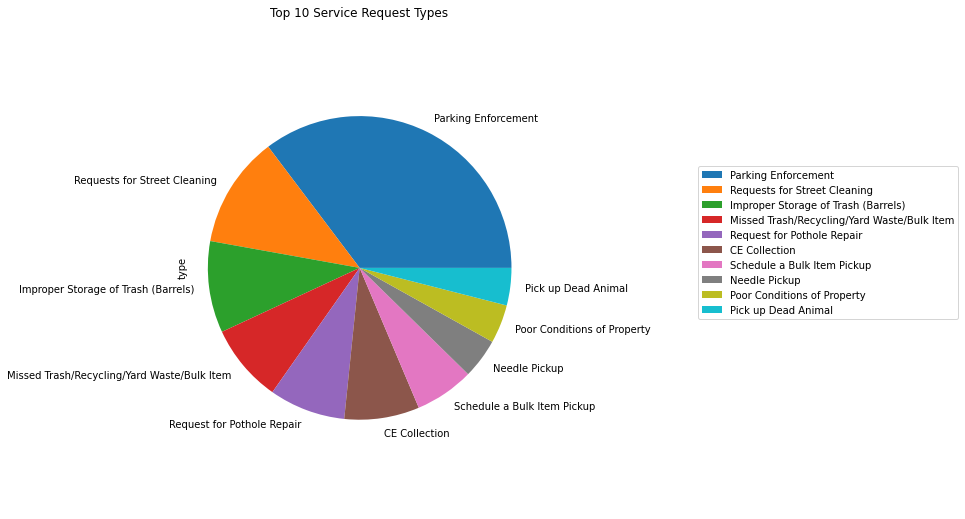

In [47]:
counts = df_311['type'].value_counts()
plt.figure(figsize=(6,9))
counts.sort_values(ascending=False)[:10].plot(kind='pie')
plt.axis('equal')
plt.title("Top 10 Service Request Types")
plt.legend(loc='center', bbox_to_anchor=(1.9, 0.55),ncol=1)
plt.show()

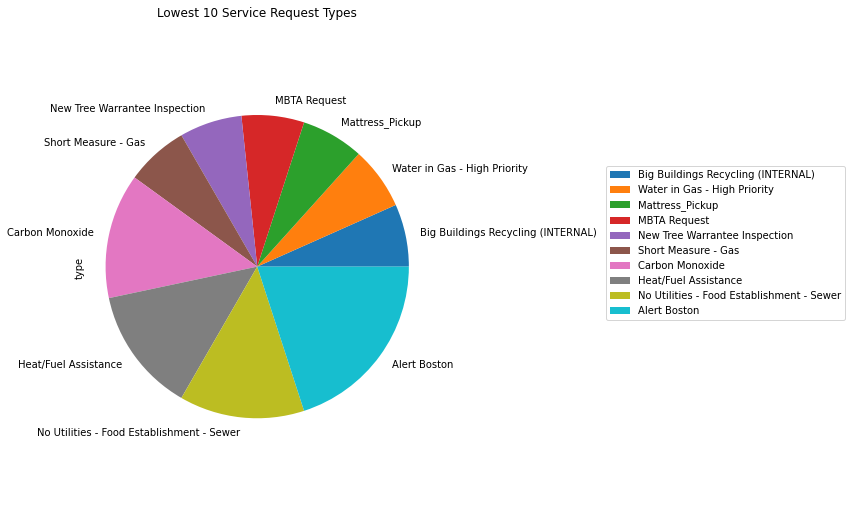

In [35]:
plt.figure(figsize=(6,9))
counts.sort_values(ascending=True)[:10].plot(kind='pie')
plt.axis('equal')
plt.title("Lowest 10 Service Request Types")
plt.legend(loc='center', bbox_to_anchor=(1.9, 0.55),ncol=1)
plt.show()

In [39]:
counts = df_311['neighborhood'].value_counts()
print(counts)

Dorchester                                      37022
South Boston / South Boston Waterfront          22101
Roxbury                                         22100
Allston / Brighton                              18100
East Boston                                     18005
South End                                       17711
Downtown / Financial District                   15625
Jamaica Plain                                   15106
Back Bay                                        13081
Greater Mattapan                                10261
Hyde Park                                        9814
Roslindale                                       9279
Boston                                           9251
Charlestown                                      8939
West Roxbury                                     8419
Beacon Hill                                      8304
Mission Hill                                     5159
Fenway / Kenmore / Audubon Circle / Longwood     5141
South Boston                

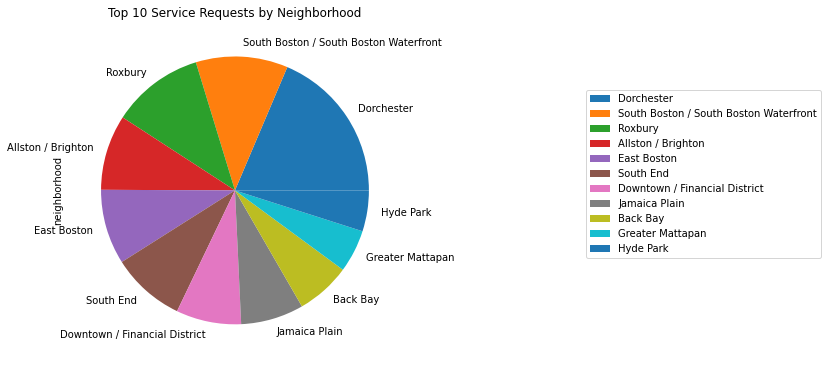

In [62]:
counts = df_311['neighborhood'].value_counts()
plt.figure(figsize=(6, 9))
counts.sort_values(ascending=False)[:11].plot(kind='pie')
plt.title("Top 10 Service Requests by Neighborhood")
plt.legend(loc='center', bbox_to_anchor=(1.9, 0.55),ncol=1)
plt.show()

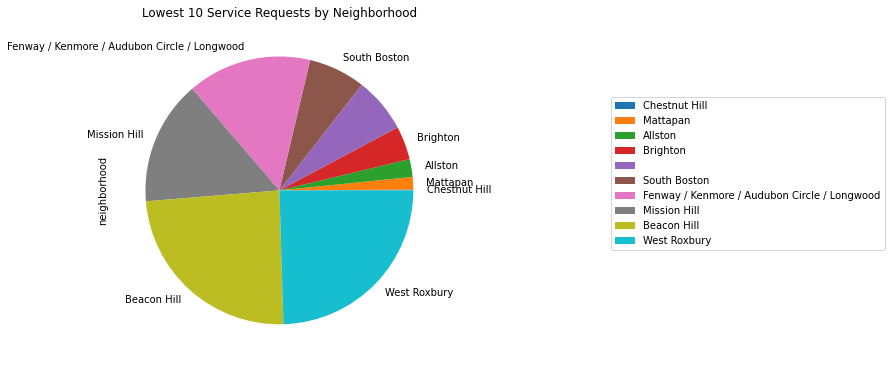

In [61]:
counts = df_311['neighborhood'].value_counts()
plt.figure(figsize=(6, 9))
counts.sort_values(ascending=True)[:10].plot(kind='pie')
plt.title("Lowest 10 Service Requests by Neighborhood")
plt.legend(loc='center', bbox_to_anchor=(1.9, 0.55),ncol=1)
plt.show()

In [57]:
def plotbar_bytype(type):
    by_type = df_311[df_311['type'] == type]
    counts = by_type['neighborhood'].value_counts()
    plt.figure(figsize=(6, 9))
    counts.sort_values(ascending=False)[:10].plot(kind='pie')
    plt.legend(loc='center', bbox_to_anchor=(1.9, 0.55),ncol=1)
    plt.title(type + ": Top 10 Count by Neighborhood")
    plt.show()

In [58]:
type_counts = df_311['type'].value_counts()[:10]
types = type_counts.keys()

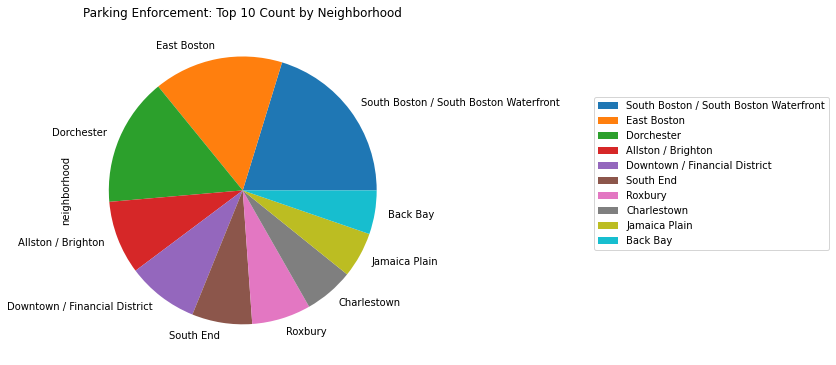

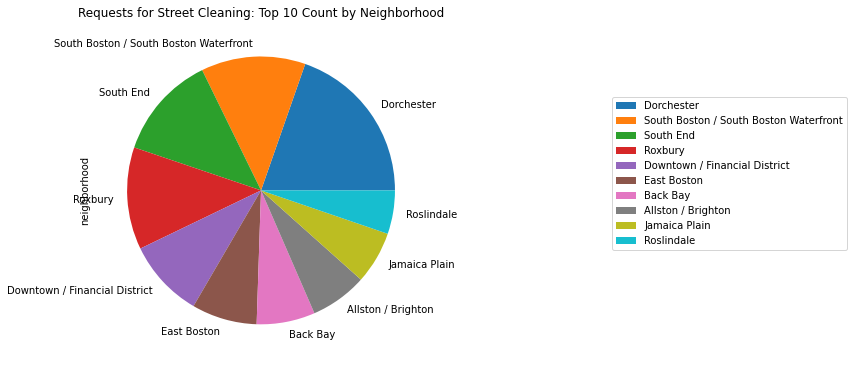

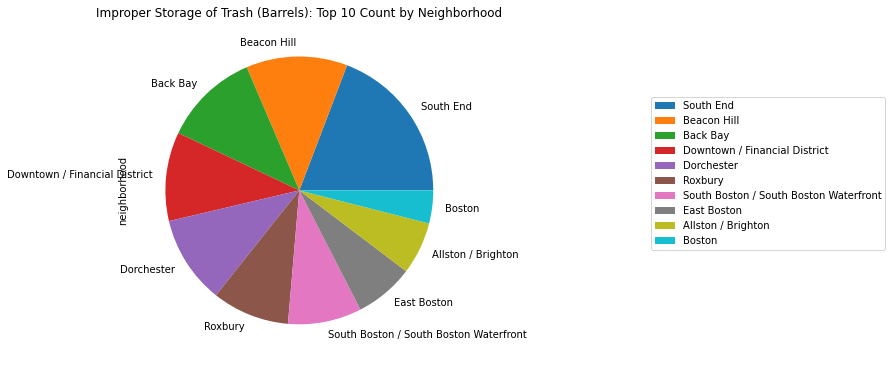

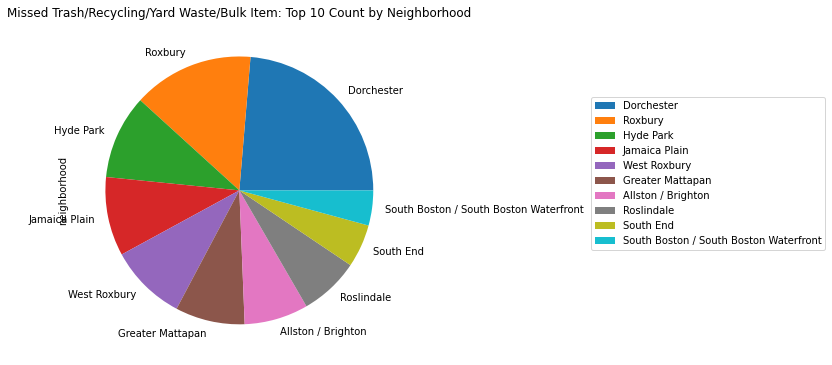

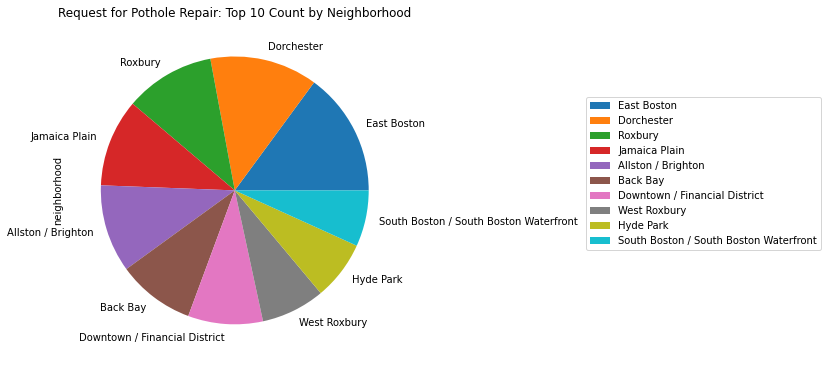

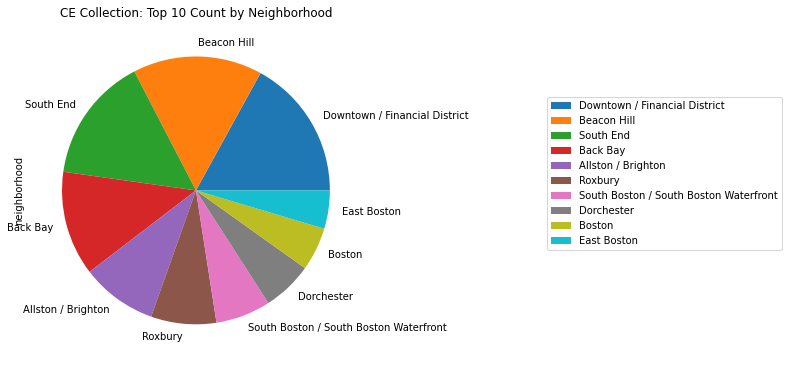

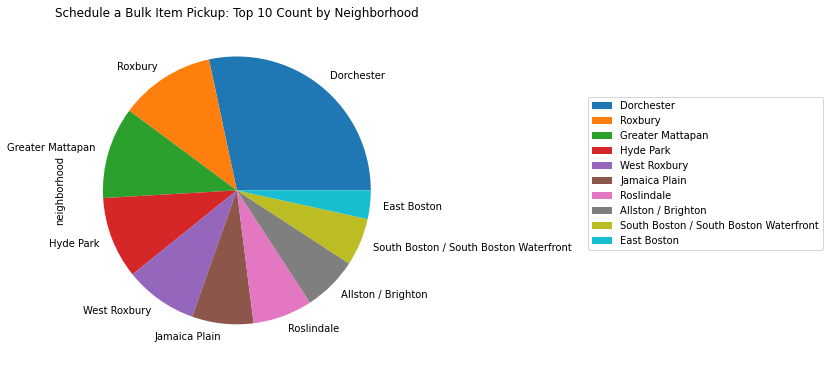

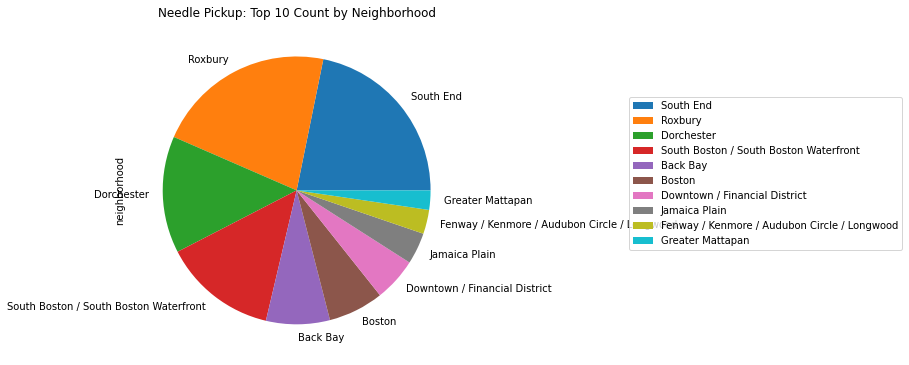

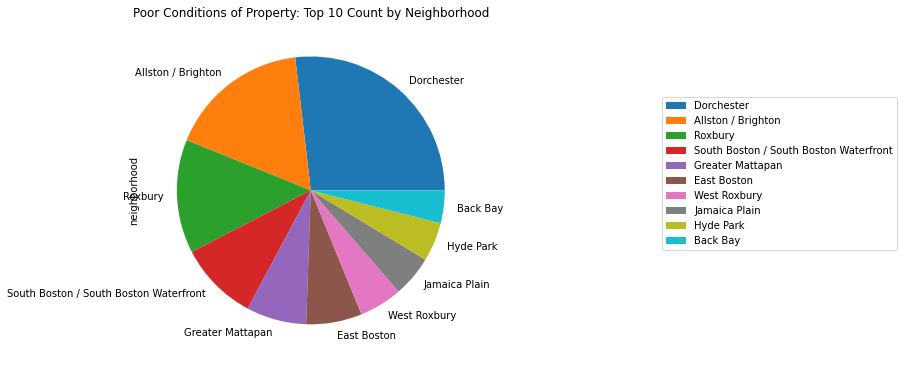

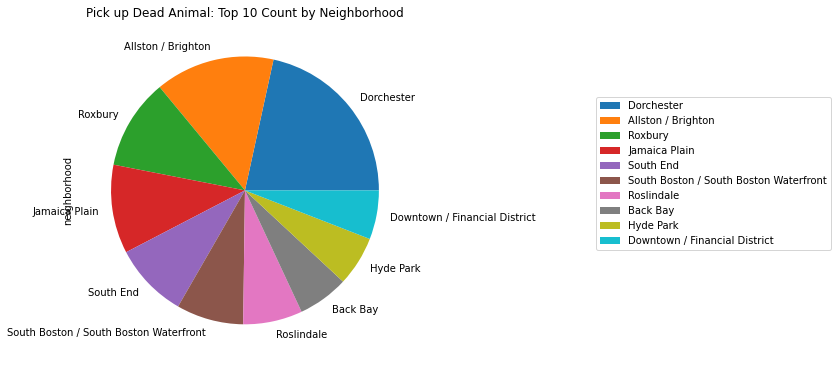

In [59]:
for t in types:
    plotbar_bytype(t)